In [1]:
import os
from rubin_sim.data import get_data_dir
from rubin_sim.scheduler.utils import season_calc
from rubin_sim.scheduler.model_observatory import ModelObservatory
from rubin_sim.scheduler.utils import run_info_table, restore_scheduler
from rubin_sim.scheduler.example import example_scheduler
from rubin_sim.scheduler import sim_runner
import numpy as np

import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
mjd_start = 60110.0
n_visit_limit = 3000

scheduler = example_scheduler(mjd_start=mjd_start)

mo = ModelObservatory(mjd_start=mjd_start)
mo, scheduler, observations = sim_runner(
    mo,
    scheduler,
    survey_length=30.0,
    verbose=False,
    filename=None,
    n_visit_limit=n_visit_limit,
)

# Won't be exact if we restart in the middle of a blob sequence since the
# queue isn't reconstructed. Also, any scripted observations that get generated
# during the night (e.g., long gaps observations) will get lost,
# so need to restart on a new night to ensure identical results.

nd = np.zeros(observations.size)
nd[1:] = np.diff(observations["night"])

break_indx = np.min(
    np.where((observations["ID"] >= n_visit_limit / 2.0) & (nd != 0))[0]
)
new_n_limit = n_visit_limit - break_indx

new_mo = ModelObservatory(mjd_start=mjd_start)
new_sched = example_scheduler(mjd_start=mjd_start)

# Restore some of the observations
new_sched, new_mo = restore_scheduler(
    break_indx - 1, new_sched, new_mo, observations, fast=False
)

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_sim/rubin_sim/scheduler/utils/utils.py:73: RuntimeWarning: invalid value encountered in cast
  self.value = np.round(inval * scale).astype(int)
/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/sky_model_pre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(


Skipped 0 observations
Flushed 184 observations from queue for being stale
Completed 3000 observations
ran in 0 min = 0.0 hours
Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


In [3]:
scheduler = example_scheduler(mjd_start=mjd_start)

mo = ModelObservatory(mjd_start=mjd_start)
mo, scheduler, observations_small = sim_runner(
    mo,
    scheduler,
    survey_length=30.0,
    verbose=False,
    filename=None,
    n_visit_limit=break_indx,
)

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_sim/rubin_sim/scheduler/utils/utils.py:73: RuntimeWarning: invalid value encountered in cast
  self.value = np.round(inval * scale).astype(int)


Skipped 0 observations
Flushed 95 observations from queue for being stale
Completed 1635 observations
ran in 0 min = 0.0 hours


In [4]:
observations_small.size

1635

In [5]:
c1 = mo.return_conditions()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/sky_model_pre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(


In [6]:
print(c1)

<Conditions mjd_start='60110.0' at 0x2a4e3fd50>


In [7]:
c2 = new_mo.return_conditions()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/sky_model_pre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(


In [8]:
print(c2)

<Conditions mjd_start='60110.0' at 0x2a4eb6c90>


In [9]:
c2.mjd

60111.44465472089

In [10]:
c1.mjd

array([60111.44465472])

In [11]:
new_mo.observatory.parked

True

In [12]:
mo.observatory.parked

False

In [13]:
observations[break_indx-1]['night']

1

In [14]:
np.degrees(c1.sun_alt)

-12.2101363643469

In [15]:
c2.sun_alt

-0.21310708167534337

In [26]:
for bf1, bf2 in zip(scheduler.survey_lists[3][0].basis_functions, new_sched.survey_lists[3][0].basis_functions):
    for f1,f2 in zip(bf1.survey_features, bf2.survey_features):
        if not np.all(bf1.survey_features[f1]() == bf2.survey_features[f2]()):
            print(bf1, bf1.survey_features[f1])
            v1 = bf1.survey_features[f1]()
            v2 = bf2.survey_features[f2]()

<rubin_sim.scheduler.basis_functions.basis_functions.VisitRepeatBasisFunction object at 0x17eda8190> <rubin_sim.scheduler.features.features.LastObserved object at 0x17eda8410>


In [29]:
v1, v2

(array([           nan,            nan,            nan, ...,
        60111.42151778, 60111.42151778, 60111.42747769]),
 array([           nan,            nan,            nan, ...,
        60111.42151778, 60111.42151778, 60111.42747769]))

In [59]:
bf1 = scheduler.survey_lists[3][0]
bf2 = new_sched.survey_lists[3][0]

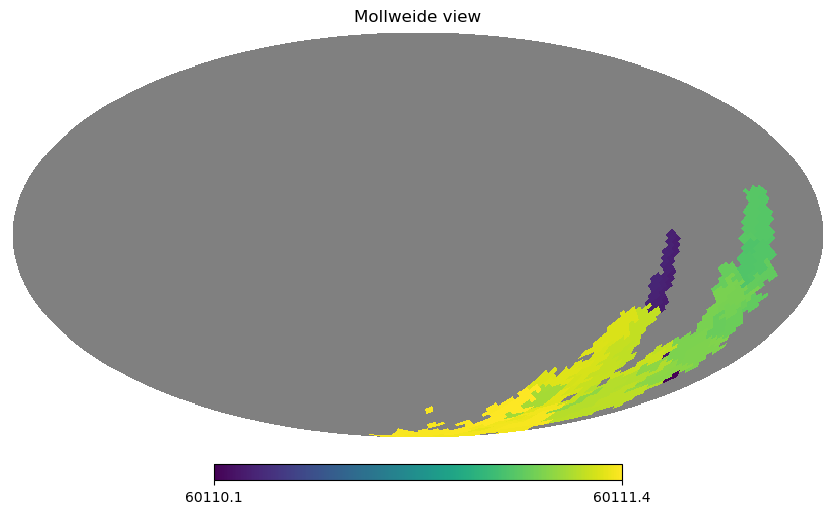

In [60]:
hp.mollview(bf1.basis_functions[6].survey_features['Last_observed']())

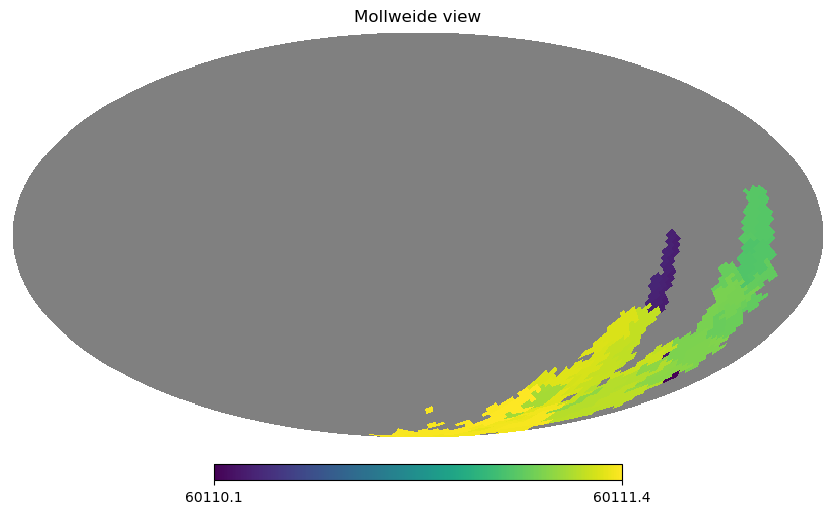

In [61]:
hp.mollview(bf2.basis_functions[6].survey_features['Last_observed']())

In [62]:
m1 = bf1.basis_functions[6].survey_features['Last_observed']()
m2 = bf2.basis_functions[6].survey_features['Last_observed']()

In [ ]:
# OK, looks like all the features in the scheduler match up (at least the ones hanging off basis functions)
# so, must be something in the model observatory or burried in the kinematic model that is different.

In [38]:
# let's try getting an observation and executing it from the scheduler
cond = mo.return_conditions()
obs = scheduler.request_observation(cond.mjd)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/sky_model_pre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/scheduler/utils/utils.py:73: RuntimeWarning: invalid value encountered in cast
  self.value = np.round(inval * scale).astype(int)


In [40]:
result = mo.observe(obs)

In [41]:
print(result)

(None, True)


In [51]:
orig_cond = mo.return_conditions()

In [54]:
new_cond = new_mo.return_conditions()
new_sched.update_conditions(new_cond)
obs = new_sched.request_observation(new_cond.mjd)

result = new_mo.observe(obs)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/skybrightness_pre/sky_model_pre.py:272: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/scheduler/utils/utils.py:73: RuntimeWarning: invalid value encountered in cast
  self.value = np.round(inval * scale).astype(int)


In [55]:
result

(None, True)

In [56]:
new_mo.mjd

array([60111.94869639])

In [57]:
new_cond = new_mo.return_conditions()

In [58]:
# compare attributes of the condition objects
vars(cond)

{'nside': 32,
 'site': <rubin_sim.utils.site.Site at 0x2a4e3cb90>,
 'exptime': 30.0,
 'mjd_start': 60110.0,
 'season_offset': array([-692.1927888, -418.2552888, -509.5677888, ..., -418.2552888,
        -509.5677888, -600.8802888]),
 'sun_ra_start': array([1.44437505]),
 'zeros_map': array([0., 0., 0., ..., 0., 0., 0.]),
 'nan_map': array([nan, nan, nan, ..., nan, nan, nan]),
 'ra': array([0.78539816, 2.35619449, 3.92699082, ..., 2.35619449, 3.92699082,
        5.49778714]),
 'dec': array([ 1.54528012,  1.54528012,  1.54528012, ..., -1.54528012,
        -1.54528012, -1.54528012]),
 '_mjd': array([60111.94869639]),
 '_alt': array([-0.54440081, -0.50844794, -0.51110984, ...,  0.54711914,
         0.54440081,  0.50844794]),
 '_az': array([6.26058056, 6.26412777, 0.02217019, ..., 3.16108481, 3.11898791,
        3.12253512]),
 '_pa': None,
 'clouds': None,
 '_slewtime': array([         nan,          nan,          nan, ..., 155.25545446,
        155.13656234, 155.27205584]),
 'current_filter'

In [59]:
vars(new_cond)

{'nside': 32,
 'site': <rubin_sim.utils.site.Site at 0x2a4eb4c90>,
 'exptime': 30.0,
 'mjd_start': 60110.0,
 'season_offset': array([-692.1927888, -418.2552888, -509.5677888, ..., -418.2552888,
        -509.5677888, -600.8802888]),
 'sun_ra_start': array([1.44437505]),
 'zeros_map': array([0., 0., 0., ..., 0., 0., 0.]),
 'nan_map': array([nan, nan, nan, ..., nan, nan, nan]),
 'ra': array([0.78539816, 2.35619449, 3.92699082, ..., 2.35619449, 3.92699082,
        5.49778714]),
 'dec': array([ 1.54528012,  1.54528012,  1.54528012, ..., -1.54528012,
        -1.54528012, -1.54528012]),
 '_mjd': array([60111.94869639]),
 '_alt': array([-0.54440081, -0.50844794, -0.51110984, ...,  0.54711914,
         0.54440081,  0.50844794]),
 '_az': array([6.26058056, 6.26412777, 0.02217019, ..., 3.16108481, 3.11898791,
        3.12253512]),
 '_pa': None,
 'clouds': None,
 '_slewtime': array([         nan,          nan,          nan, ..., 155.25545446,
        155.13656234, 155.27205584]),
 'current_filter'

In [60]:
new_mo.observatory.parked

True